In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from numpy import savetxt
from scipy.stats import norm
import math
import matplotlib.pyplot as plt

In [ ]:
folder_path = '/content/drive/MyDrive/GMU/Classes/CS_700/Project/Analysis'
sample_size = 30 #78 max

In [ ]:
obsDs = ['L', 'H']           # A: Obstacle densities
freqs = ['05', '10', '15']   # B: Frequencies
mapSizes = ['2', '4']        # C: Local map sizes
sampleCs = ['1', '2', '3', '4', '5']        # runs

In [ ]:
# Create random sample data

# Set the random seed for reproducibility
np.random.seed(10)

for od in obsDs:
    for f in freqs:
      for m in mapSizes:
        random_selected = np.array([])
        for sc in sampleCs:
          file_name = f"{folder_path}/NewData/{od}{f}{m}{sc}.txt"
          with open(file_name, 'r') as file:
            # Select random sample
            runtimes = np.array([float(line.strip()) for line in file])
            random_sample = np.random.choice(runtimes, size=sample_size, \
                                             replace=False)
            random_selected = np.append(random_selected, random_sample, axis=0)

        # Save the random sample in both .npy and .csv formats
        np.save(f'{folder_path}/New_Random_Sampled_Data/{od}{f}{m}.npy', \
                random_selected)
        np.savetxt(f'{folder_path}/New_Random_Sampled_Data/{od}{f}{m}.csv', \
                   random_selected, delimiter=',', fmt='%.6f')


In [ ]:
sample_path = f'{folder_path}/New_Random_Sampled_Data'

a = 2     # Obstacle densities
b = 3     # Frequencies
c = 2     # Local map sizes
n = 5*sample_size

Y = np.zeros((a, b, c, n))

for i in range(a):
  for j in range(b):
    for k in range(c):
      file_path = f'{sample_path}/{obsDs[i]}{freqs[j]}{mapSizes[k]}.npy'
      y_ijk0 = np.load(file_path)
      Y[i][j][k]=y_ijk0

In [ ]:
# Sums
s0000 = np.sum(Y)
print("s0000", s0000)
si000 = np.sum(Y, axis=(1, 2, 3))
print('si000')
print(si000)
s0j00 = np.sum(Y, axis=(0, 2, 3))
print('s0j00')
print(s0j00)
s00k0 = np.sum(Y, axis=(0, 1, 3))
print('s00k0')
print(s00k0)

sij00 = np.sum(Y, axis=(2, 3))
print('sij00')
print(sij00)
si0k0 = np.sum(Y, axis=(1, 3))
print('si0k0')
print(si0k0)
s0jk0 = np.sum(Y, axis=(0, 3))
print('s0jk0')
print(s0jk0)
sijk0 = np.sum(Y, axis=3)
print('sijk0')
print(sijk0)

s0000 31331.293552000003
si000
[15989.415898 15341.877654]
s0j00
[10382.302853 10519.982594 10429.008105]
s00k0
[15522.521516 15808.772036]
sij00
[[5455.023987 5301.695197 5232.696714]
 [4927.278866 5218.287397 5196.311391]]
si0k0
[[7955.855229 8033.560669]
 [7566.666287 7775.211367]]
s0jk0
[[5047.60631  5334.696543]
 [5354.793667 5165.188927]
 [5120.121539 5308.886566]]
sijk0
[[[2627.680409 2827.343578]
  [2752.126796 2549.568401]
  [2576.048024 2656.64869 ]]

 [[2419.925901 2507.352965]
  [2602.666871 2615.620526]
  [2544.073515 2652.237876]]]


In [ ]:
# Calculate Sum Squares

# A: Obstacle densities
# B: Frequencies
# C: Local map sizes

S = (s0000**2)/(a*b*c*n)#

SST = np.sum(Y**2) - S #
SSA = np.sum(si000**2)/(b*c*n) - S #
SSB = np.sum(s0j00**2)/(a*c*n) - S #
SSC = np.sum(s00k0**2)/(a*b*n) - S #

SSAB = np.sum(sij00**2)/(c*n) - np.sum(si000**2)/(b*c*n) - np.sum(s0j00**2)/(a*c*n) + S
SSAC = np.sum(si0k0**2)/(b*n) - np.sum(si000**2)/(b*c*n) - np.sum(s00k0**2)/(a*b*n) + S
SSBC = np.sum(s0jk0**2)/(a*n) - np.sum(s0j00**2)/(a*c*n) - np.sum(s00k0**2)/(a*b*n) + S

SSABC = np.sum(sijk0**2)/n - np.sum(sij00**2)/(c*n) - np.sum(si0k0**2)/(b*n) \
        - np.sum(s0jk0**2)/(a*n) + np.sum(si000**2)/(b*c*n) \
        + np.sum(s0j00**2)/(a*c*n) + np.sum(s00k0**2)/(a*b*n) - S

SSE = SST - SSA - SSB - SSC - SSAB - SSAC - SSBC - SSABC

In [ ]:
# Calculate Mean Squares

s2a = SSA/(a-1)
s2b = SSB/(b-1)
s2c = SSC/(c-1)
s2ab = SSAB/((a-1)*(b-1))
s2ac = SSAC/((a-1)*(c-1))
s2bc = SSBC/((b-1)*(c-1))
s2abc = SSABC/((a-1)*(b-1)*(c-1))
s2e = SSE/(a*b*c*(n-1))

In [ ]:
# Computed F values

Fa = s2a/s2e
Fb = s2b/s2e
Fc = s2c/s2e
Fab = s2ab/s2e
Fac = s2ac/s2e
Fbc = s2bc/s2e
Fabc = s2abc/s2e

In [ ]:
print(f'{Fa:.5f}')
print(f"{Fb:.5f}")
print(f'{Fc:.5f}')
print(f'{Fab:.5f}')
print(f'{Fac:.5f}')
print(f'{Fbc:.5f}')
print(f'{Fabc:.5f}')

22.97120
0.80569
4.48896
12.08207
0.93785
10.41085
4.44537


In [ ]:
# Get tabulated F values

from scipy.stats import f
alpha = 0.01

F_crit_a = f.ppf(1 - alpha, a-1, a*b*c*(n-1))
F_crit_b = f.ppf(1 - alpha, b-1, a*b*c*(n-1))
F_crit_c = f.ppf(1 - alpha, c-1, a*b*c*(n-1))
F_crit_ab = f.ppf(1 - alpha, (a-1)*(b-1), a*b*c*(n-1))
F_crit_ac = f.ppf(1 - alpha, (a-1)*(c-1), a*b*c*(n-1))
F_crit_bc = f.ppf(1 - alpha, (b-1)*(c-1), a*b*c*(n-1))
F_crit_abc = f.ppf(1 - alpha, (a-1)*(b-1)*(c-1), a*b*c*(n-1))

In [ ]:
print(f'{F_crit_a:.5f}')
print(f'{F_crit_b:.5f}')
print(f'{F_crit_c:.5f}')
print(f'{F_crit_ab:.5f}')
print(f'{F_crit_ac:.5f}')
print(f'{F_crit_bc:.5f}')
print(f'{F_crit_abc:.5f}')

6.64908
4.61705
6.64908
4.61705
6.64908
4.61705
4.61705


In [ ]:
print('=====RESULTS====')
print('Fa', '>' if Fa>F_crit_a else '<=', 'F_crit_a')
print('Fb', '>' if Fb>F_crit_b else '<=', 'F_crit_b')
print('Fc', '>' if Fc>F_crit_c else '<=', 'F_crit_c')
print('Fab', '>' if Fab>F_crit_ab else '<=', 'F_crit_ab')
print('Fac', '>' if Fac>F_crit_ac else '<=', 'F_crit_ac')
print('Fbc', '>' if Fbc>F_crit_bc else '<=', 'F_crit_bc')
print('Fabc', '>' if Fabc>F_crit_abc else '<=', 'F_crit_abc')
print()

print('=====Sum of Squares====')
print(f'SSA=',f'{SSA:.3f}')
print(f'SSB=',f'{SSB:.3f}')
print(f'SSC=',f'{SSC:.3f}')
print(f'SSAB=',f'{SSAB:.3f}')
print(f'SSAC=',f'{SSAC:.3f}')
print(f'SSBC=',f'{SSBC:.3f}')
print(f'SSABC=',f'{SSABC:.3f}')
print(f'SSE=',f'{SSE:.3f}')
print(f'SST=',f'{SST:.3f}')
print()

print('=====Ratios====')
print(f'SSA/SST=',f'{SSA/SST:.4f}')
print(f'SSB/SST=',f'{SSB/SST:.4f}')
print(f'SSC/SST=',f'{SSC/SST:.4f}')
print(f'SSAB/SST=',f'{SSAB/SST:.4f}')
print(f'SSAC/SST=',f'{SSAC/SST:.4f}')
print(f'SSBC/SST=',f'{SSBC/SST:.4f}')
print(f'SSABC/SST=',f'{SSABC/SST:.4f}')
print(f'SSE/SST=',f'{SSE/SST:.4f}')
print()

print('=====Ratios====')
print(f'SSA/SST=',f'{(SSA/SST)*100:.2f} %')
print(f'SSB/SST=',f'{(SSB/SST)*100:.2f} %')
print(f'SSC/SST=',f'{(SSC/SST)*100:.2f} %')
print(f'SSAB/SST=',f'{(SSAB/SST)*100:.2f} %')
print(f'SSAC/SST=',f'{(SSAC/SST)*100:.2f} %')
print(f'SSBC/SST=',f'{(SSBC/SST)*100:.2f} %')
print(f'SSABC/SST=',f'{(SSABC/SST)*100:.2f} %')
print(f'SSE/SST=',f'{(SSE/SST)*100:.2f} %')
print()

print('=====dof====')
print(f'SSA=',(a-1))
print(f'SSB=',(b-1))
print(f'SSC=',(c-1))
print(f'SSAB=',(a-1)*(b-1))
print(f'SSAC=',(a-1)*(c-1))
print(f'SSBC=',(b-1)*(c-1))
print(f'SSABC=',(a-1)*(b-1)*(c-1))
print(f'SSE=',a*b*c*(n-1))
print(f'SST=',a*b*c*n-1)
print()

print('=====Mean square====')
print(f's2a=',f'{s2a:.3f}')
print(f's2b=',f'{s2b:.3f}')
print(f's2c=',f'{s2c:.3f}')
print(f's2ab=',f'{s2ab:.3f}')
print(f's2ac=',f'{s2ac:.3f}')
print(f's2bc=',f'{s2bc:.3f}')
print(f's2abc=',f'{s2abc:.3f}')
print(f's2e=',f'{s2e:.3f}')

=====RESULTS====
Fa > F_crit_a
Fb <= F_crit_b
Fc <= F_crit_c
Fab > F_crit_ab
Fac <= F_crit_ac
Fbc > F_crit_bc
Fabc <= F_crit_abc

=====Sum of Squares====
SSA= 232.948
SSB= 16.341
SSC= 45.522
SSAB= 245.045
SSAC= 9.511
SSBC= 211.150
SSABC= 90.160
SSE= 18131.852
SST= 18982.528

=====Ratios====
SSA/SST= 0.0123
SSB/SST= 0.0009
SSC/SST= 0.0024
SSAB/SST= 0.0129
SSAC/SST= 0.0005
SSBC/SST= 0.0111
SSABC/SST= 0.0047
SSE/SST= 0.9552

=====Ratios====
SSA/SST= 1.23 %
SSB/SST= 0.09 %
SSC/SST= 0.24 %
SSAB/SST= 1.29 %
SSAC/SST= 0.05 %
SSBC/SST= 1.11 %
SSABC/SST= 0.47 %
SSE/SST= 95.52 %

=====dof====
SSA= 1
SSB= 2
SSC= 1
SSAB= 2
SSAC= 1
SSBC= 2
SSABC= 2
SSE= 1788
SST= 1799

=====Mean square====
s2a= 232.948
s2b= 8.170
s2c= 45.522
s2ab= 122.523
s2ac= 9.511
s2bc= 105.575
s2abc= 45.080
s2e= 10.141


In [ ]:
# A: L vs H
print("A: L vs H")
meanA = np.mean(Y, axis=(1, 2, 3))
print('mean', meanA)
stdA = np.std(Y, axis=(1, 2, 3), ddof=1)
print('std', stdA)
errorA = norm.ppf(0.995)*stdA/math.sqrt(900)
print('Error A', errorA)
ci_low = meanA - norm.ppf(0.995)*stdA/math.sqrt(900)
ci_high = meanA + norm.ppf(0.995)*stdA/math.sqrt(900)
print('CI low', ci_low)
print('CI high', ci_high)
print()

A: L vs H
mean [17.76601766 17.04653073]
std [3.32310137 3.13257677]
Error A [0.28532473 0.2689661 ]
CI low [17.48069293 16.77756463]
CI high [18.05134239 17.31549683]



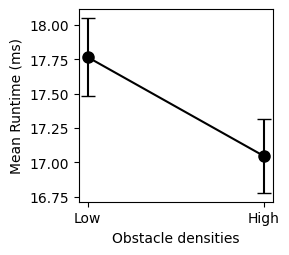

In [ ]:
# Plotting
obsDSLabel = ['Low', 'High']
# plt.errorbar(obsDSLabel, meanA, yerr=errorA, fmt='o', color='black', capsize=5, markersize=8, label='Mean runtime')
# plt.plot(obsDSLabel, meanA, linestyle='-', color='black')

# plt.xlabel('Obstacle densities')
# plt.ylabel('Mean Runtime (ms)')
# # plt.title('Mean runtime VS Obstacle densities')
# plt.grid(False)
# # plt.legend()
# plt.show()

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.errorbar(obsDSLabel, meanA, yerr=errorA, fmt='o', color='black', capsize=5, markersize=8, label='Mean runtime')
ax.plot(obsDSLabel, meanA, linestyle='-', color='black')
ax.set_xlabel('Obstacle densities')
ax.set_ylabel('Mean Runtime (ms)')
plt.show()

In [ ]:
# A vs B
print("A vs B")
meanAB = np.mean(Y, axis=(2, 3))
print('mean')
print(meanAB)
stdAB = np.std(Y, axis=(2, 3), ddof=1)
print('std')
print(stdAB)
errorAB = norm.ppf(0.995)*stdAB/math.sqrt(300)
ci_low = meanAB - norm.ppf(0.995)*stdAB/math.sqrt(300)
ci_high = meanAB + norm.ppf(0.995)*stdAB/math.sqrt(300)
print('CI low')
print(ci_low)
print('CI high')
print(ci_high)
print('Error AB', errorAB)

# print()
# for i in range(a):
#   for j in range(b):
#     print(f'({meanval[i][j]:.3f})', end='')
#   print()

print()
for i in range(a):
  for j in range(b):
    print(f'({ci_low[i][j]:.3f}, {ci_high[i][j]:.3f})', end='')
  print()

A vs B
mean
[[18.18341329 17.67231732 17.44232238]
 [16.42426289 17.39429132 17.32103797]]
std
[[3.31890979 3.78026993 2.75835666]
 [3.0568649  2.87652256 3.36161942]]
CI low
[[17.68983971 17.11013231 17.03211179]
 [15.96965947 16.96650762 16.82111281]]
CI high
[[18.67698687 18.23450234 17.85253297]
 [16.87886631 17.82207503 17.82096313]]
Error AB [[0.49357358 0.56218501 0.41021059]
 [0.45460342 0.4277837  0.49992516]]

(17.690, 18.677)(17.110, 18.235)(17.032, 17.853)
(15.970, 16.879)(16.967, 17.822)(16.821, 17.821)


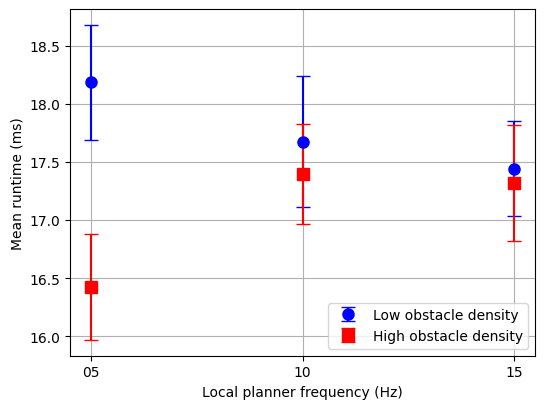

In [ ]:
# Plotting
# plt.errorbar(freqs, meanAB[0], yerr=errorAB[0], fmt='o', color='blue', capsize=5, markersize=8, label='Low obstacle density')

# plt.errorbar(freqs, meanAB[1], yerr=errorAB[1], fmt='s', color='red', capsize=5, markersize=8, label='High obstacle density')

# plt.xlabel('Local planner frequency (Hz)')
# plt.ylabel('Mean runtime (ms)')
# plt.grid(True)
# plt.legend(loc='lower right')
# plt.tight_layout()
# plt.show()



fig, ax = plt.subplots(figsize=(6,4.5))
ax.errorbar(freqs, meanAB[0], yerr=errorAB[0], fmt='o', color='blue', capsize=5, markersize=8, label='Low obstacle density')
ax.errorbar(freqs, meanAB[1], yerr=errorAB[1], fmt='s', color='red', capsize=5, markersize=8, label='High obstacle density')
ax.set_xlabel('Local planner frequency (Hz)')
ax.set_ylabel('Mean runtime (ms)')
ax.grid(True)
ax.legend(loc='lower right')
plt.show()

In [ ]:
# B vs C
print("B vs C")
meanBC = np.mean(Y, axis=(0, 3))
print('mean', meanBC)
stdBC = np.std(Y, axis=(0, 3), ddof=1)
print('std', stdBC)
errorBC = norm.ppf(0.995)*stdBC/math.sqrt(300)
ci_low = meanBC - norm.ppf(0.995)*stdBC/math.sqrt(300)
ci_high = meanBC + norm.ppf(0.995)*stdBC/math.sqrt(300)
print('CI low')
print(ci_low)
print('CI high')
print(ci_high)
print('Error BC', errorBC)

print()
for i in range(b):
  for j in range(c):
    print(f'({meanBC[i][j]:.3f})', end='')
  print()

print()
for i in range(b):
  for j in range(c):
    print(f'({ci_low[i][j]:.3f}, {ci_high[i][j]:.3f})', end='')
  print()

B vs C
mean [[16.82535437 17.78232181]
 [17.84931222 17.21729642]
 [17.0670718  17.69628855]]
std [[3.3104697  3.23935655]
 [3.15599849 3.52744736]
 [2.99932712 3.11798236]]
CI low
[[16.33303596 17.30057904]
 [17.3799661  16.69271006]
 [16.62102514 17.23259602]]
CI high
[[17.31767277 18.26406458]
 [18.31865835 17.74188278]
 [17.51311845 18.15998109]]
Error BC [[0.4923184  0.48174277]
 [0.46934613 0.52458636]
 [0.44604665 0.46369254]]

(16.825)(17.782)
(17.849)(17.217)
(17.067)(17.696)

(16.333, 17.318)(17.301, 18.264)
(17.380, 18.319)(16.693, 17.742)
(16.621, 17.513)(17.233, 18.160)


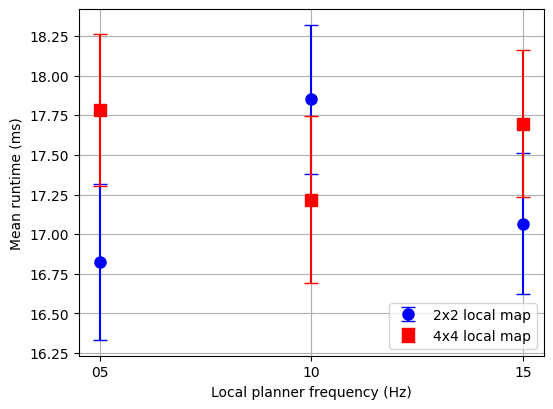

In [ ]:
# Plotting
# plt.errorbar(freqs, np.transpose(meanBC)[0], yerr=np.transpose(errorBC)[0], fmt='o', color='blue', capsize=5, markersize=8, label='2x2 local map')
# # plt.plot(freqs, np.transpose(meanBC)[0], linestyle='-', color='blue')

# plt.errorbar(freqs, np.transpose(meanBC)[1], yerr=np.transpose(errorBC)[1], fmt='s', color='red', capsize=5, markersize=8, label='4x4 local map')
# # plt.plot(freqs, np.transpose(meanBC)[1], linestyle='-', color='salmon')

# plt.xlabel('Local planner frequency (Hz)')
# plt.ylabel('Mean runtime (ms)')
# # plt.title('Mean runtime VS Local planner frequency')
# plt.grid(True)
# plt.legend(loc='lower right')

# plt.tight_layout()
# plt.show()


fig, ax = plt.subplots(figsize=(6, 4.5))
ax.errorbar(freqs, np.transpose(meanBC)[0], yerr=np.transpose(errorBC)[0], fmt='o', color='blue', capsize=5, markersize=8, label='2x2 local map')
ax.errorbar(freqs, np.transpose(meanBC)[1], yerr=np.transpose(errorBC)[1], fmt='s', color='red', capsize=5, markersize=8, label='4x4 local map')
ax.set_xlabel('Local planner frequency (Hz)')
ax.set_ylabel('Mean runtime (ms)')
ax.grid(True)
ax.legend(loc='lower right')
plt.show()

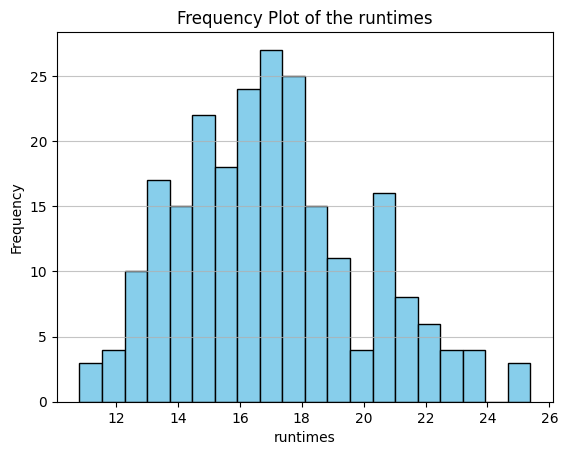


Mean = 16.982 ms and std = 2.958 ms



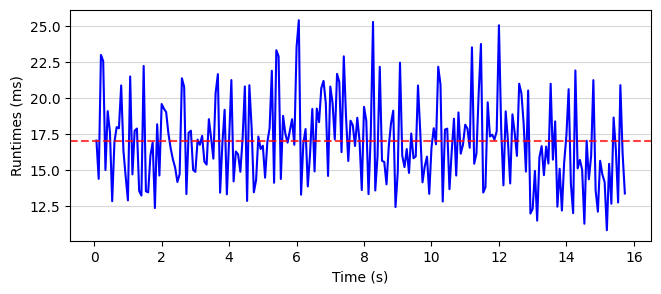

In [ ]:
# Plot a sample run

file_name = f"{folder_path}/NewData/H1522.txt"
frequency = 15.0


with open(file_name, 'r') as file:
  runtimes = np.array([float(line.strip()) for line in file])

  plt.hist(runtimes, bins=20, color='skyblue', edgecolor='black')
  plt.xlabel('runtimes')
  plt.ylabel('Frequency')
  plt.title('Frequency Plot of the runtimes')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

with open(file_name, 'r') as file:
  runtimes = np.array([float(line.strip()) for line in file])

  meanrt = np.mean(runtimes)
  stdrt = np.std(runtimes, ddof=1)
  print()
  print(f'Mean = {meanrt:.3f} ms and std = {stdrt:.3f} ms')
  print()

  timestamp = np.array([(i+1)/frequency for i in range(runtimes.size)])

  # plt.plot(timestamp, runtimes, marker='o', linestyle='-', color='blue')
  # plt.xlabel('Time (s)')
  # plt.ylabel('Runtimes (ms)')
  # plt.title('Runtimes')
  # plt.xticks(rotation=45)
  # plt.grid(True)
  # plt.show()


  fig, ax = plt.subplots(figsize=(7.5, 3))
  ax.plot(timestamp, runtimes, linestyle='-', color='blue')
  ax.axhline(runtimes.mean(), color='red', linestyle='--',alpha=0.75, label='Mean')
  ax.set_xlabel('Time (s)')
  ax.set_ylabel('Runtimes (ms)')
  # ax.set_title('Runtimes during a navigation')
  ax.grid(axis='y', alpha=0.5)
  plt.show()

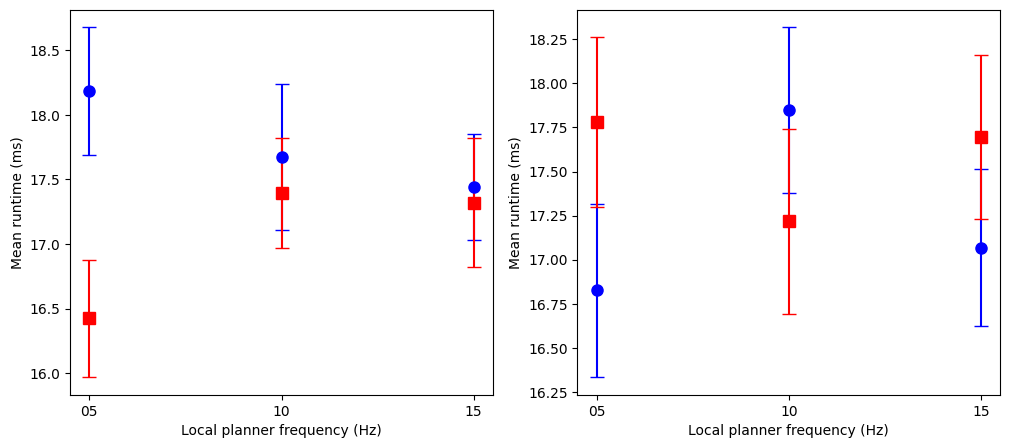

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].errorbar(freqs, meanAB[0], yerr=errorAB[0], fmt='o', color='blue', capsize=5, markersize=8, label='Low obstacle density')
ax[0].errorbar(freqs, meanAB[1], yerr=errorAB[1], fmt='s', color='red', capsize=5, markersize=8, label='High obstacle density')
ax[0].set_xlabel('Local planner frequency (Hz)')
ax[0].set_ylabel('Mean runtime (ms)')

ax[1].errorbar(freqs, np.transpose(meanBC)[0], yerr=np.transpose(errorBC)[0], fmt='o', color='blue', capsize=5, markersize=8, label='2x2 local map')
ax[1].errorbar(freqs, np.transpose(meanBC)[1], yerr=np.transpose(errorBC)[1], fmt='s', color='red', capsize=5, markersize=8, label='4x4 local map')
ax[1].set_xlabel('Local planner frequency (Hz)')
ax[1].set_ylabel('Mean runtime (ms)')

plt.show()